# Latar belakang
Dalam dunia ritel modern, terutama pada sektor supermarket, persaingan semakin ketat dan kebutuhan untuk memahami perilaku pelanggan menjadi sangat penting. Tidak cukup hanya menarik pelanggan baru namun mempertahankan dan memaksimalkan potensi pelanggan yang sudah ada justru menjadi kunci dalam meningkatkan profitabilitas bisnis.

Salah satu pendekatan yang dapat digunakan untuk memahami perilaku pelanggan adalah segmentasi berbasis data. Dengan melakukan segmentasi, perusahaan dapat mengelompokkan pelanggan ke dalam beberapa kategori berdasarkan karakteristik tertentu, sehingga strategi pemasaran yang dijalankan dapat lebih terarah dan efektif. Dalam hal ini, metode LRFM (Length, Recency, Frequency, Monetary) merupakan salah satu pendekatan segmentasi yang sangat relevan karena mampu menggambarkan nilai dan kebiasaan belanja pelanggan secara menyeluruh.

* Length  menunjukkan berapa lama pelanggan telah bertransaksi dengan perusahaan.

* Recency menunjukkan kapan terakhir kali pelanggan melakukan pembelian.

* Frequency menunjukkan seberapa sering pelanggan berbelanja.

* Monetary menunjukkan seberapa besar uang yang dikeluarkan oleh pelanggan.

Dengan mengelompokkan pelanggan berdasarkan keempat aspek ini, perusahaan dapat mengidentifikasi segmen pelanggan yang memiliki nilai tinggi, pelanggan potensial, maupun pelanggan yang berisiko churn. Dari sini, strategi personalisasi pemasaran dan promosi bisa disesuaikan untuk masing-masing segmen.

Di sisi lain, supermarket juga memiliki sejumlah produk unggulan yang menjadi kontributor penting terhadap penjualan. Dengan mengaitkan segmentasi pelanggan menggunakan LRFM dan perilaku pembelian terhadap produk unggulan, perusahaan dapat lebih tepat sasaran dalam menetapkan strategi promosi, bundling, atau loyalitas.

# Rumusan Masalah
* Apakah segmentasi pelanggan menggunakan pendekatan LRFM dapat memberikan dampak terhadap penjualan produk unggulan dan strategi peningkatan profit perusahaan?
* Apa saja produk unggulan yang memiliki kontribusi besar terhadap pelanggan dari masing-masing segmen?

# Tujuan Analisis
Sebagai Data Analyst di supermarket, saya ingin meningkatkan Profit dengan Segmentasi Pelanggan dan Analisis Produk Unggulan

Dataset ini berisi informasi customer dari sebuah supermarket, terdapat 29 Kolom di dalam dataset supermarket customer, yaitu :
* ID : ID untuk setiap customer
* Year_Birth : tahun lahir customer
* Education : Level pendidikan customer
* Marital_Status : Status perkawinan customer
* Income : Pendapatan customer
* Kidhome : Jumlah anak customer
* Teenhome : Jumlah anak remaja customer
* Dt_Customer : Tanggal daftar customer
* Recency : Jumlah hari sejak pembelian terakhir customer
* Complain : Jika value 1, customer mengeluh dalam 2 tahun terakhir
* MntWines : Jumlah wine yang dibeli
* MntFruits : Jumlah buah yang dibeli
* MntMeatProducts : Jumlah daging yang dibeli
* MntFishProducts : Jumlah ikan yang dibeli
* MntSweetProducts : jumlah permen yang dibeli
* MntGoldProds : jumlah emas yang dibeli
* NumDealsPurchases : jumlah produk diskon yang dibeli
* AcceptedCmp1 : jika value 1, customer menerima tawaran campaign yang pertama
* AcceptedCmp2 : jika value 1, customer menerima tawaran campaign yang kedua
* AcceptedCmp3 : jika value 1, customer menerima tawaran campaign yang ketiga
* AcceptedCmp4 : jika value 1, customer menerima tawaran campaign yang keempat
* AcceptedCmp5 : jika value 1, customer menerima tawaran campaign yang kelima
* response : jika value 1, customer menerima tawaran campaign yang terakhir
* NumWebPurchases : pembelian produk di web
* NumCatalogPurchases : pembelian produk menggunakan katalog
* NumStorePurchases : pembelian produk langsung di toko
* NumWebVisitsMonth : jumlah kunjungan ke situs web supermarket.
* Z_CostContact : -
* Z_Revenue : -

## **Import Library** ##

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import kruskal

# 1. Cleaning Data

## Import Dataset to DataFrame

In [3]:
df_raw = pd.read_csv('Supermarket Customers.csv',sep=None)
df_raw

C:\Users\HP\AppData\Local\Temp\ipykernel_1600\2476449329.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df_raw = pd.read_csv('Supermarket Customers.csv',sep=None)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Mengecek info DataFrame

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Mengecek Value unique tiap kolom

In [5]:
df_raw.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

## Handle Missing 
mengecek jumlah value yang kosong

In [6]:
df_raw.isna().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## Pengujian untuk mengisi value NaN 

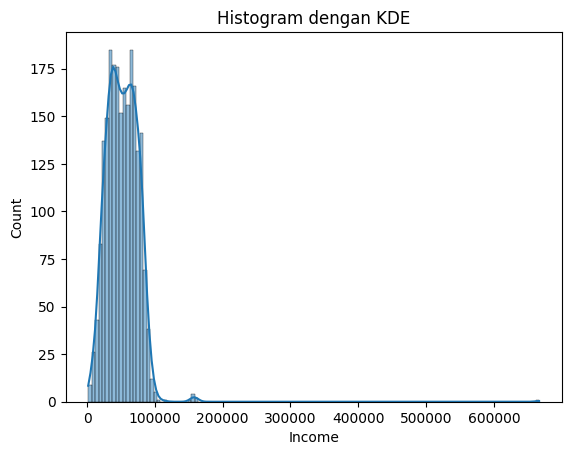

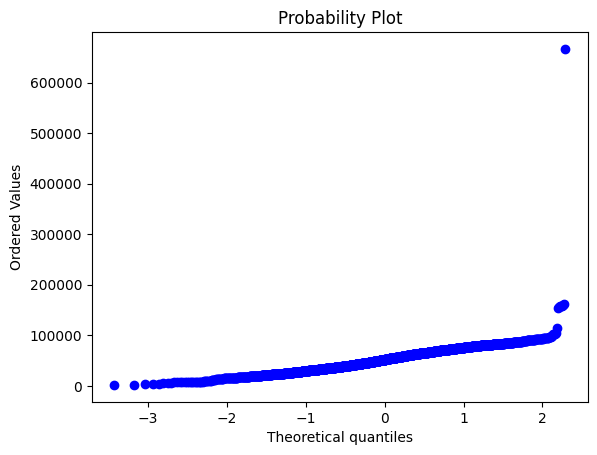

Uji Shapiro-Wilk: Stat=nan, p-value=nan
Data tidak terdistribusi normal (Menolak hipotesis nol).
Uji Kolmogorov-Smirnov: Stat=nan, p-value=nan
Data tidak terdistribusi normal (Menolak hipotesis nol).
Uji D'Agostino and Pearson: Stat=nan, p-value=nan
Data tidak terdistribusi normal (Menolak hipotesis nol).


In [7]:
data = df_raw['Income']
# 1. Visualisasi dengan Histogram dan Q-Q Plot
sns.histplot(data, kde=True)
plt.title('Histogram dengan KDE')
plt.show()

# Q-Q Plot
stats.probplot(data, dist="norm", plot=plt)
plt.show()

# 2. Uji Shapiro-Wilk
stat, p_value = stats.shapiro(data)
print(f"Uji Shapiro-Wilk: Stat={stat}, p-value={p_value}")
if p_value > 0.05:
    print("Data terdistribusi normal (Gagal menolak hipotesis nol).")
else:
    print("Data tidak terdistribusi normal (Menolak hipotesis nol).")

# 3. Uji Kolmogorov-Smirnov
stat, p_value = stats.kstest(data, 'norm')
print(f"Uji Kolmogorov-Smirnov: Stat={stat}, p-value={p_value}")
if p_value > 0.05:
    print("Data terdistribusi normal (Gagal menolak hipotesis nol).")
else:
    print("Data tidak terdistribusi normal (Menolak hipotesis nol).")

# 4. Uji D'Agostino and Pearson
stat, p_value = stats.normaltest(data)
print(f"Uji D'Agostino and Pearson: Stat={stat}, p-value={p_value}")
if p_value > 0.05:
    print("Data terdistribusi normal (Gagal menolak hipotesis nol).")
else:
    print("Data tidak terdistribusi normal (Menolak hipotesis nol).")

Dari hasil uji diatas, value dari kolom Income tidak terdistribusi secara normal, maka untuk mengisi value yang kosong menggunakan median

In [8]:
df_raw['Income'].fillna(df_raw['Income'].median(), inplace=True)


In [9]:
#Mengecek Value Kosong
df_raw.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Mengecek Data Duplikat

In [10]:
df_raw.duplicated().sum()

np.int64(0)

## Mengubah Format Data
Mengubah Format data kolom Dt_Customer menjadi datetime dan kolom ID menjadi String

In [11]:
#ubah ke datetime
df_raw['Dt_Customer'] = pd.to_datetime(df_raw['Dt_Customer'], format='%d-%m-%Y')

In [12]:
#ubah ke string
df_raw['ID'] = df_raw['ID'].apply(str)

In [13]:
#cek type kolom dataframe
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

## Handle Outlier


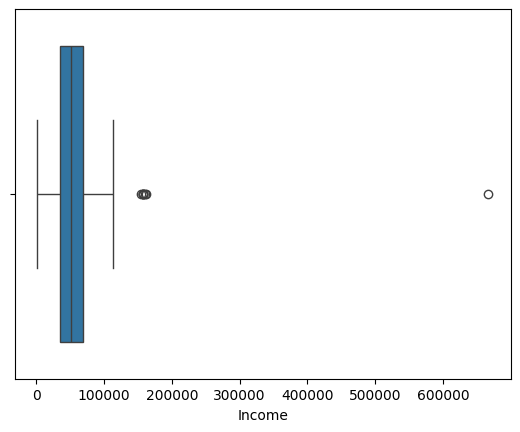

In [14]:
sns.boxplot(x=df_raw['Income'])
plt.show()

In [15]:
#Mencari nilai income di atas 600000
df_raw[df_raw['Income'] > 600000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0


In [16]:
# Mengambil value yang kurang dari 600000 untuk dijadikan kolom income
df_raw = df_raw[df_raw['Income'] <= 600000]

## Mengubah nama kolom

In [17]:
df_raw.rename(columns={
    'MntWines': 'Spend_Wine',
    'MntFruits': 'Spend_Fruit',
    'MntMeatProducts': 'Spend_Meat',
    'MntFishProducts': 'Spend_Fish',
    'MntSweetProducts': 'Spend_Sweets',
    'MntGoldProds': 'Spend_Gold',
    'NumDealsPurchases': 'Buy_With_Deals',
    'NumWebPurchases': 'Buy_Web',
    'NumCatalogPurchases': 'Buy_Catalog',
    'NumStorePurchases': 'Buy_Store',
    'NumWebVisitsMonth': 'Web_Visits_Per_Month',
}, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_1600\3794432292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw.rename(columns={


## Membuat kolom untuk kebutuhan analisis LRFM

In [18]:
# Total pengeluaran pelanggan (Monetary)
df_raw['Monetary'] = df_raw[['Spend_Wine', 'Spend_Fruit', 'Spend_Meat',
                     'Spend_Fish', 'Spend_Sweets', 'Spend_Gold']].sum(axis=1)

# Total frekuensi belanja (Frequency)
df_raw['Frequency'] = df_raw[['Buy_Web', 'Buy_Catalog', 'Buy_Store', 'Buy_With_Deals']].sum(axis=1)

# Tentukan tanggal snapshot (misalnya tanggal terakhir di data)
snapshot_date = df_raw['Dt_Customer'].max()

# Hitung Length (berapa hari pelanggan sudah terdaftar)
df_raw['Length'] = (snapshot_date - df_raw['Dt_Customer']).dt.days

#ubah Length dari hari ke bulan
df_raw['Length_Months'] = df_raw['Length'] // 30

C:\Users\HP\AppData\Local\Temp\ipykernel_1600\1059196544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['Monetary'] = df_raw[['Spend_Wine', 'Spend_Fruit', 'Spend_Meat',
C:\Users\HP\AppData\Local\Temp\ipykernel_1600\1059196544.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['Frequency'] = df_raw[['Buy_Web', 'Buy_Catalog', 'Buy_Store', 'Buy_With_Deals']].sum(axis=1)
C:\Users\HP\AppData\Local\Temp\ipykernel_1600\1059196544.py:12: SettingWithCopyWarning: 
A value is trying to be set on a 

## Menghapus kolom yang tidak digunakan

In [19]:
df_raw.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Z_CostContact','Z_Revenue','Response'], axis=1, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_1600\2215935567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Z_CostContact','Z_Revenue','Response'], axis=1, inplace=True)


In [20]:
df_raw

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Spend_Wine,...,Spend_Gold,Buy_With_Deals,Buy_Web,Buy_Catalog,Buy_Store,Web_Visits_Per_Month,Monetary,Frequency,Length,Length_Months
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,88,3,8,10,4,7,1617,25,663,22
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,6,2,1,1,2,5,27,6,113,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,42,1,8,2,10,4,776,21,312,10
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,5,2,2,0,4,6,53,8,139,4
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,15,5,5,3,6,5,422,19,161,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,247,2,9,3,4,5,1341,18,381,12
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,8,7,8,2,5,7,444,22,19,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,24,1,2,3,13,6,1241,19,155,5
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,61,2,6,5,10,3,843,23,156,5


# 2. Analisis

## Analisis LRFM

In [21]:
df_clean = df_raw

Membuat segmentasi untuk analisis LRFM

In [22]:
df_lrfm = df_clean.copy()


# Scoring kuartil (semakin tinggi = semakin baik)
df_lrfm['L_score'] = pd.qcut(df_lrfm['Length'], q=4, labels=[4, 3, 2, 1]).astype(int)
df_lrfm['R_score'] = pd.qcut(df_lrfm['Recency'], q=4, labels=[1, 2, 3, 4]).astype(int)  
df_lrfm['F_score'] = pd.qcut(df_lrfm['Frequency'], q=4, labels=[1, 2, 3, 4]).astype(int)
df_lrfm['M_score'] = pd.qcut(df_lrfm['Monetary'], q=4, labels=[1, 2, 3, 4]).astype(int)

# Gabungkan jadi LRFM Score
df_lrfm['LRFM_Score'] = (
    df_lrfm['L_score'].astype(str) +
    df_lrfm['R_score'].astype(str) +
    df_lrfm['F_score'].astype(str) +
    df_lrfm['M_score'].astype(str)
)

# Segmentasi dasar berdasarkan pola skor
def segment_customer(row):
    score = row['LRFM_Score']
    if score.startswith('4') and score.endswith('4'):
        return 'Loyal High-Value'
    elif row['F_score'] >= 3 and row['M_score'] >= 3:
        return 'Potential Loyalist'
    elif row['F_score'] <= 2 and row['M_score'] <= 2:
        return 'Low Value'
    else:
        return 'Mid Value'

df_lrfm['Segment'] = df_lrfm.apply(segment_customer, axis=1)

# Tampilkan hasil
df_lrfm[['ID', 'Length', 'Recency','Frequency', 'Monetary', 'LRFM_Score', 'Segment']].head()

,ID,Length,Recency,Frequency,Monetary,LRFM_Score,Segment
0,5524,663,58,25,1617,1344,Potential Loyalist
1,2174,113,38,6,27,4211,Low Value
2,4141,312,26,21,776,3233,Potential Loyalist
3,6182,139,26,8,53,4211,Low Value
4,5324,161,94,19,422,4433,Potential Loyalist


Jumlah pelanggan per segmennya

In [23]:
# Jumlah pelanggan per segmen
segment_count = df_lrfm['Segment'].value_counts().reset_index()
segment_count.columns = ['Segment', 'Jumlah Pelanggan']
segment_count

,Segment,Jumlah Pelanggan
0,Low Value,1050
1,Potential Loyalist,933
2,Mid Value,151
3,Loyal High-Value,105


C:\Users\HP\AppData\Local\Temp\ipykernel_1600\4067515647.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


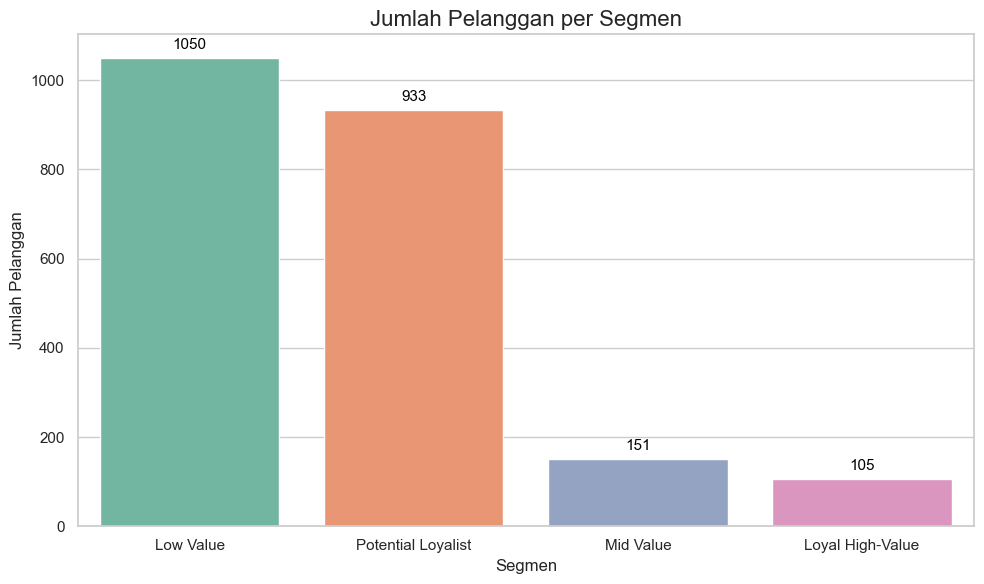

In [24]:
# # Set gaya visual
sns.set(style="whitegrid")

# Ukuran plot
plt.figure(figsize=(10, 6))

# Buat barplot
barplot = sns.barplot(
    data=segment_count,
    x='Segment',
    y='Jumlah Pelanggan',
    palette='Set2'
)

# Tambahkan label angka di atas tiap batang
for index, row in segment_count.iterrows():
    barplot.text(index, row['Jumlah Pelanggan'] + 20, row['Jumlah Pelanggan'], 
                 color='black', ha="center", fontsize=11)

# Judul dan label sumbu
plt.title('Jumlah Pelanggan per Segmen', fontsize=16)
plt.xlabel('Segmen', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)

# Tampilkan plot
plt.tight_layout()
plt.show()

Insight :
* Segment Low Value memiliki pelanggan terbanyak sebesar 1050
* Segment Loyal High-Value memiliki pelanggan sedikit dengan jumlah 105

Presentase distribusi segmen pelanggan

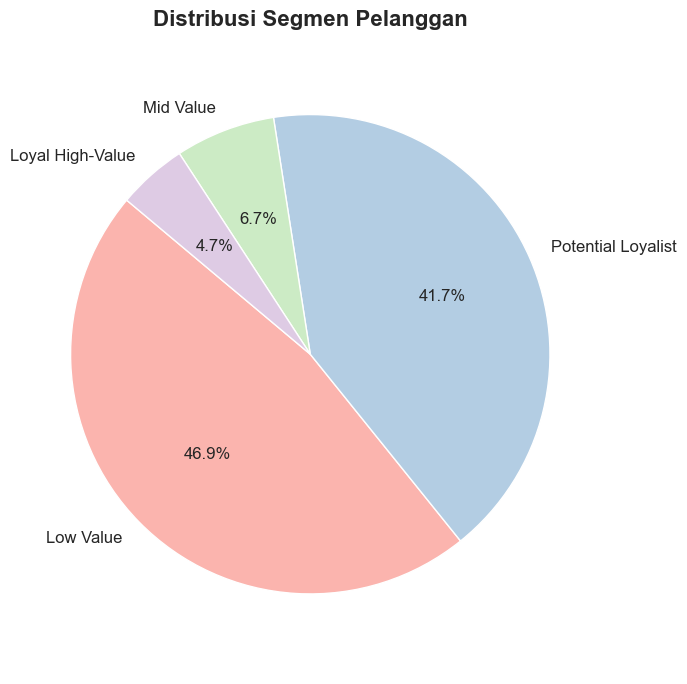

In [25]:
# Data segmentasi
segment_counts = df_lrfm['Segment'].value_counts()
labels = segment_counts.index
sizes = segment_counts.values
colors = plt.cm.Pastel1.colors

# Plot pie chart
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white'}
)

# Styling
ax.set_title('Distribusi Segmen Pelanggan', fontsize=16, fontweight='bold')
ax.axis('equal')  # Pie jadi lingkaran

plt.tight_layout()
plt.show()


Insight :
* Mayoritas pelanggan termasuk dalam segmen Low Value (46.9%) yang menunjukkan bahwa hampir separuh pelanggan memiliki nilai belanja dan frekuensi rendah.
* Segmen Potential Loyalist (41.7%) juga mendominasi yang dimana pelanggan ini menunjukkan potensi menjadi pelanggan setia jika dikelola dengan baik, misalnya melalui program loyalitas atau promosi khusus.
* Segmen Mid Value (6.7%) dan Loyal High-Value (4.7%) Merupakan kelompok minoritas namun berpotensi besar dalam kontribusi profit, terutama segmen Loyal High-Value.

Convert Dataframe yang telah di cleaning ke bentuk file .CSV

In [26]:
# df_lrfm.to_csv('Supermarket Customers Clean With LRFM.csv',index=False)

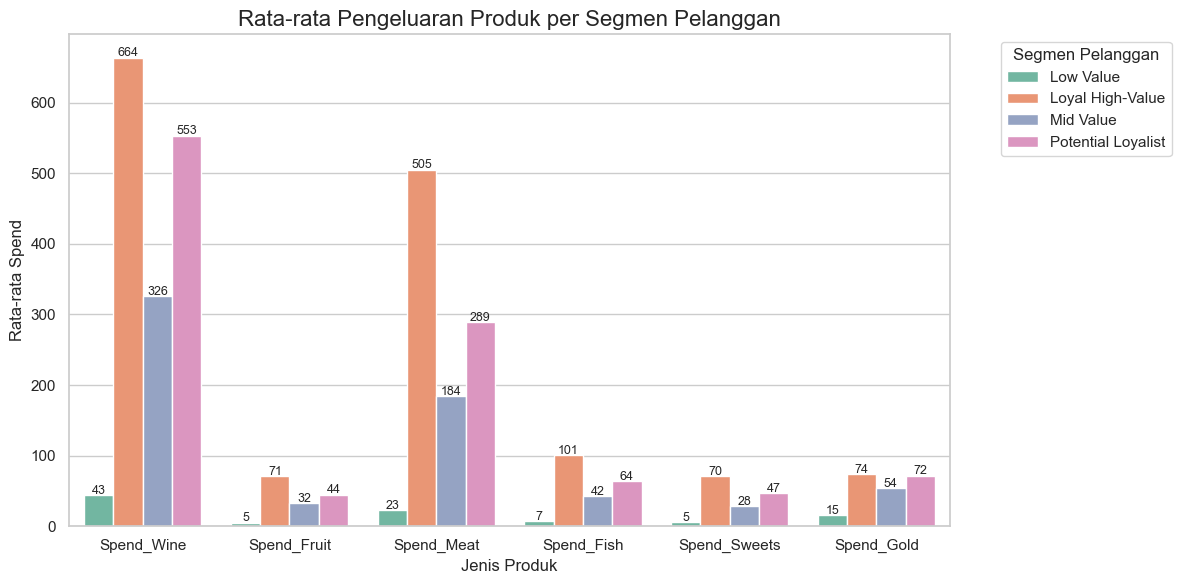

In [27]:
# Kolom produk
product_cols = ['Spend_Wine', 'Spend_Fruit', 'Spend_Meat', 'Spend_Fish', 'Spend_Sweets', 'Spend_Gold']

# Hitung rata-rata pengeluaran produk per segmen
segment_product_avg = df_lrfm.groupby('Segment')[product_cols].mean().reset_index()

# Ubah ke format long (melt) untuk keperluan visualisasi
df_melt = segment_product_avg.melt(
    id_vars='Segment', 
    var_name='Produk', 
    value_name='Rata-rata Pengeluaran'
)

# Plot diagram batang
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=df_melt, 
    x='Produk', 
    y='Rata-rata Pengeluaran', 
    hue='Segment', 
    palette='Set2'
)

# Tambahkan label angka di atas batang
for p in barplot.patches:
    height = p.get_height()
    if height > 0:
        barplot.text(
            p.get_x() + p.get_width() / 2., 
            height + 2,
            f'{height:.0f}', 
            ha="center", 
            fontsize=9
        )

# Tambahkan elemen visual
plt.title('Rata-rata Pengeluaran Produk per Segmen Pelanggan', fontsize=16)
plt.xlabel('Jenis Produk', fontsize=12)
plt.ylabel('Rata-rata Spend', fontsize=12)
plt.legend(title='Segmen Pelanggan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Uji Statistik
Uji statistik ini menggunakan uji Kruskal-Wallis

In [28]:
# Kelompokkan nilai 'Spend_Wine' berdasarkan segmentasi pelanggan
groups = [group['Spend_Wine'].values for name, group in df_lrfm.groupby('Segment')]

# Lakukan uji Kruskal-Wallis
stat, p = kruskal(*groups)

# Cetak hasil uji lengkap dengan penjelasan hipotesis
print("UJI KRUSKAL-WALLIS: Pengaruh Segmentasi terhadap produk Wine per Pelanggan\n")
print("Hipotesis:")
print("H0 (nol)   : Tidak ada perbedaan produk Wine yang signifikan antar segmen pelanggan.")
print("Ha (alternatif): Terdapat perbedaan produk Wine yang signifikan antar segmen pelanggan.\n")
print(f"Hasil Uji Statistik: {stat:.2f}")
print(f"p-value           : {p:.4f}")

# Interpretasi
if p < 0.05:
    print("\nKesimpulan: \nKarena p-value < 0.05, maka H0 ditolak.")
    print("Terdapat perbedaan signifikan dalam produk Wine antar segmen pelanggan.")
else:
    print("\nKesimpulan: \nKarena p-value ≥ 0.05, maka H0 gagal ditolak.")
    print("Tidak terdapat perbedaan signifikan dalam produk Wine antar segmen pelanggan.")

UJI KRUSKAL-WALLIS: Pengaruh Segmentasi terhadap produk Wine per Pelanggan

Hipotesis:
H0 (nol)   : Tidak ada perbedaan produk Wine yang signifikan antar segmen pelanggan.
Ha (alternatif): Terdapat perbedaan produk Wine yang signifikan antar segmen pelanggan.

Hasil Uji Statistik: 1606.56
p-value           : 0.0000

Kesimpulan: 
Karena p-value < 0.05, maka H0 ditolak.
Terdapat perbedaan signifikan dalam produk Wine antar segmen pelanggan.


# Kesimpulan
### Segmentasi Pelanggan dengan Pendekatan LRFM
1. Pelanggan berhasil dikelompokkan ke dalam 4 segmen: 
* Loyal High-Value
* Potential Loyalist
* Mid Value
* Low Value
2. Dengan pendekatan ini, ditemukan bahwa:
* Segmen Loyal High-Value dan Potential Loyalist memiliki pengeluaran rata-rata paling tinggi, khususnya pada produk-produk premium seperti Wine dan Meat.
* Segmentasi berbasis LRFM terbukti memberikan dampak terhadap pemahaman perilaku pembelian pelanggan, yang dapat dimanfaatkan untuk strategi peningkatan profit, seperti bundling, promosi spesifik segmen, atau retensi pelanggan bernilai tinggi.
3. Dari hasil uji Kruskal-Wallis terhadap pengeluaran produk seperti Spend_Wine, didapatkan bahwa nilai hasil dari
uji statistik : 1606.56, p-value: 0.0000 .
Artinya, terdapat perbedaan signifikan dalam pengeluaran produk antar segmen pelanggan.
Maka, segmentasi LRFM memang memengaruhi penjualan produk unggulan.

### Berdasarkan Analisis Produk Unggulan per Segmen
1. Segmen Loyal High-Value memiliki rata-rata pengeluaran tertinggi untuk produk:
* Spend_Wine
* Spend_Gold 
* Spend_Meat
2. Segmen Mid Value dan Potential Loyalist memiliki kontribusi tinggi terhadap produk:
* Spend_Fruits 
* Spend_Meat
3. Segmen Low Value memiliki kontribusi pengeluaran yang rendah di semua produk.

# Rekomendasi
1. Segment Loyal High-Value
* Fokus Produk : Wine dan Meat
* Rata-Rata Pengeluaran : 663.71 / 622.57
* Strategi : Berikan akses eksklusif ke produk baru atau diskon kecil (5%) untuk menjaga loyalitas
2. Segment Potential Loyalist
* Fokus Produk : Wine dan Meat
* Rata-Rata Pengeluaran : 553.47 / 564.12
* Strategi : Berikan diskon langsung 10% pada pembelian ke-2 dalam 30 hari untuk mendorong retensi
3. Segment Mid Value
* Fokus Produk : Wine dan Meat
* Rata-Rata Pengeluaran : 325.53 / 318.76
* Strategi : Berikan voucher belanja harga 20 untuk pembelian minimal seharga 300
4. Segment Low Value
* Fokus Produk : semua Produk
* Rata-Rata Pengeluaran : < 50
* Strategi : Berikan diskon besar satu kali 25% untuk pembelian pertama minimal 100 untuk menarik kembali pelanggan
